# 1. Load and Inspect Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/water.csv')
data.head(2)

,Unnamed: 0,Canal_id,year,Canal_name,Sample_water_point,TEMP. (oC),pH,DO (mg/l),H2S (mg/l),BOD (mg/l),COD (mg/l),SS (mg/l),TKN (mg/l),NH3N (mg/l),NO2 (mg/l),NO3 (mg/l),T-P (mg/l),T.Coliform (col/100ml),Sample_water_point (EN),Canal_name (EN)
0,1,12.0,2561,คลองคูเมืองเดิม,ปตร.ราชินี,25.0,8.0,2.7,0.0,5.0,42.0,26.0,2.2,0.9,0.0,2.2,0.1,930000.0,Her Royal Highness Princess Maha Chakri Sirind...,Khlong Khu Mueang Derm
1,2,13.0,2561,คลองคูเมืองเดิม,หน้ากรมที่ดิน,25.0,8.1,2.4,0.0,5.0,53.0,25.0,1.7,0.6,0.0,2.2,0.1,11000000.0,Department of Lands page,Khlong Khu Mueang Derm


In [3]:
data.shape

(917, 20)

In [4]:
data.columns

Index(['Unnamed: 0', 'Canal_id', 'year', 'Canal_name', 'Sample_water_point',
       'TEMP. (oC)', '  pH', 'DO (mg/l)', 'H2S (mg/l)', 'BOD (mg/l)',
       'COD (mg/l)', 'SS (mg/l)', 'TKN (mg/l)', 'NH3N (mg/l)', 'NO2 (mg/l)',
       'NO3 (mg/l)', 'T-P (mg/l)', 'T.Coliform (col/100ml)',
       'Sample_water_point (EN)', 'Canal_name (EN)'],
      dtype='object')

In [5]:
# Rename the columns
cols = {
    'Unnamed: 0': 'Index',
    'Canal_id': 'CID',
    'year': 'Year',
    'Canal_name': 'CN',
    'Sample_water_point': 'WSP',
    'TEMP. (oC)': 'Temp',
    '  pH': 'pH',
    'DO (mg/l)': 'DO',
    'H2S (mg/l)': 'HS',
    'BOD (mg/l)': 'BO',
    'COD (mg/l)': 'CO',
    'SS (mg/l)': 'SS',
    'TKN (mg/l)': 'TKN',
    'NH3N (mg/l)': 'AN',
    'NO2 (mg/l)': 'NO2N',
    'NO3 (mg/l)': 'NO3N',
    'T-P (mg/l)': 'TP',
    'T.Coliform (col/100ml)': 'TC',
    'Sample_water_point (EN)': 'WSPEN',
    'Canal_name (EN)': 'CNEN'
}


data = data.rename(columns=cols)
data.columns

Index(['Index', 'CID', 'Year', 'CN', 'WSP', 'Temp', 'pH', 'DO', 'HS', 'BO',
       'CO', 'SS', 'TKN', 'AN', 'NO2N', 'NO3N', 'TP', 'TC', 'WSPEN', 'CNEN'],
      dtype='object')

# 2. Exploratory Data Analysis (EDA)

Drop unnecessary columns from the dataset.

In [6]:
# We have translated Canal Name and Water Source Point. So drop those columns in thai language.
data.drop(columns=['Index', 'CN', 'WSP'], inplace=True)

In [7]:
data['CNEN'].value_counts()

CNEN
Khlong Saen Saep                               33
Khlong Prem Prachakorn                         24
Khlong Chong Nonsi                             18
Khlong Rob Krung                               18
Khlong Phlapphla                               18
                                               ..
Khlong Bang Luang                               1
Khlong Phra Rajadamri 1 (Khlong Bueng Phai)     1
Khlong Phraya Suren                             1
Orachon Canal                                   1
Khlong Tanod                                    1
Name: count, Length: 168, dtype: int64

**Data Preprocessing**

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CID,917.0,7.297593e+02,5.539785e+02,12.0,2.210000e+02,5.910000e+02,1.191000e+03,1.822000e+03
Year,917.0,2.562009e+03,8.200079e-01,2561.0,2.561000e+03,2.562000e+03,2.563000e+03,2.563000e+03
Temp,917.0,2.869433e+01,1.845115e+00,0.0,2.850000e+01,2.900000e+01,2.930000e+01,3.190000e+01
pH,917.0,7.242007e+00,4.628296e-01,0.0,7.130000e+00,7.290000e+00,7.400000e+00,9.100000e+00
DO,917.0,1.667045e+00,1.282984e+00,0.0,5.100000e-01,1.600000e+00,2.600000e+00,9.700000e+00
HS,917.0,1.798037e-01,3.896647e-01,0.0,0.000000e+00,0.000000e+00,2.000000e-01,5.000000e+00
BO,917.0,1.280267e+01,9.397183e+00,0.0,6.250000e+00,9.800000e+00,1.583000e+01,8.450000e+01
CO,917.0,6.410376e+01,2.235050e+01,0.0,5.100000e+01,6.050000e+01,7.210000e+01,2.020000e+02
SS,917.0,2.195372e+01,1.719485e+01,0.0,1.200000e+01,1.700000e+01,2.600000e+01,1.483000e+02
TKN,917.0,7.999945e+00,5.133194e+00,0.0,4.100000e+00,7.100000e+00,1.080000e+01,3.980000e+01


Check for column types.

In [9]:
data.dtypes

CID      float64
Year       int64
Temp     float64
pH       float64
DO       float64
HS       float64
BO       float64
CO       float64
SS       float64
TKN      float64
AN       float64
NO2N     float64
NO3N     float64
TP       float64
TC       float64
WSPEN     object
CNEN      object
dtype: object

In [10]:
# using label encoding for these 4 features
# as they are objects and need to be a real num or a int.

from sklearn.preprocessing import LabelEncoder

features = ["WSPEN", "CNEN"]

for feat in features:
    le = LabelEncoder()
    data[feat] = le.fit_transform(data[feat])

Check for null values in the dataset.

In [11]:
data.isna().sum()

CID      0
Year     0
Temp     0
pH       0
DO       0
HS       0
BO       0
CO       0
SS       0
TKN      0
AN       0
NO2N     0
NO3N     0
TP       0
TC       0
WSPEN    0
CNEN     0
dtype: int64

Seems we have no null values in our dataset.

In [12]:
data.head()

,CID,Year,Temp,pH,DO,HS,BO,CO,SS,TKN,AN,NO2N,NO3N,TP,TC,WSPEN,CNEN
0,12.0,2561,25.0,8.0,2.7,0.0,5.0,42.0,26.0,2.2,0.9,0.00,2.2,0.1,930000.0,61,61
1,13.0,2561,25.0,8.1,2.4,0.0,5.0,53.0,25.0,1.7,0.6,0.00,2.2,0.1,11000000.0,58,61
2,14.0,2561,25.0,8.0,1.7,0.0,5.0,56.0,24.0,2.2,0.6,0.34,2.3,0.2,4600000.0,114,61
3,15.0,2561,25.0,7.9,3.0,0.0,4.0,47.0,17.0,2.8,0.6,0.00,1.9,0.1,30000.0,155,61
4,16.0,2561,25.0,7.3,1.4,0.0,6.0,36.0,7.0,2.8,0.6,0.14,1.1,0.3,1500000.0,28,61


In [13]:
# Skewness and Kurtosis of numerical columns
print("Skewness:\n", data.select_dtypes(include='number').skew())

Skewness:
 CID       0.465911
Year     -0.016114
Temp    -12.500872
pH      -12.456230
DO        0.672971
HS        5.532990
BO        2.243097
CO        2.282213
SS        3.015937
TKN       1.404893
AN        1.444743
NO2N      0.935423
NO3N      2.221041
TP        0.721560
TC             NaN
WSPEN    -0.004069
CNEN     -0.010430
dtype: float64


In [14]:
print("\nKurtosis:\n", data.select_dtypes(include='number').kurtosis())


Kurtosis:
 CID       -1.116403
Year      -1.512721
Temp     190.207743
pH       195.164468
DO         1.272318
HS        48.930997
BO         7.508975
CO         9.833919
SS        13.187015
TKN        3.640077
AN         2.644681
NO2N       0.777716
NO3N      15.322368
TP         0.871746
TC              NaN
WSPEN     -1.254632
CNEN      -1.062828
dtype: float64


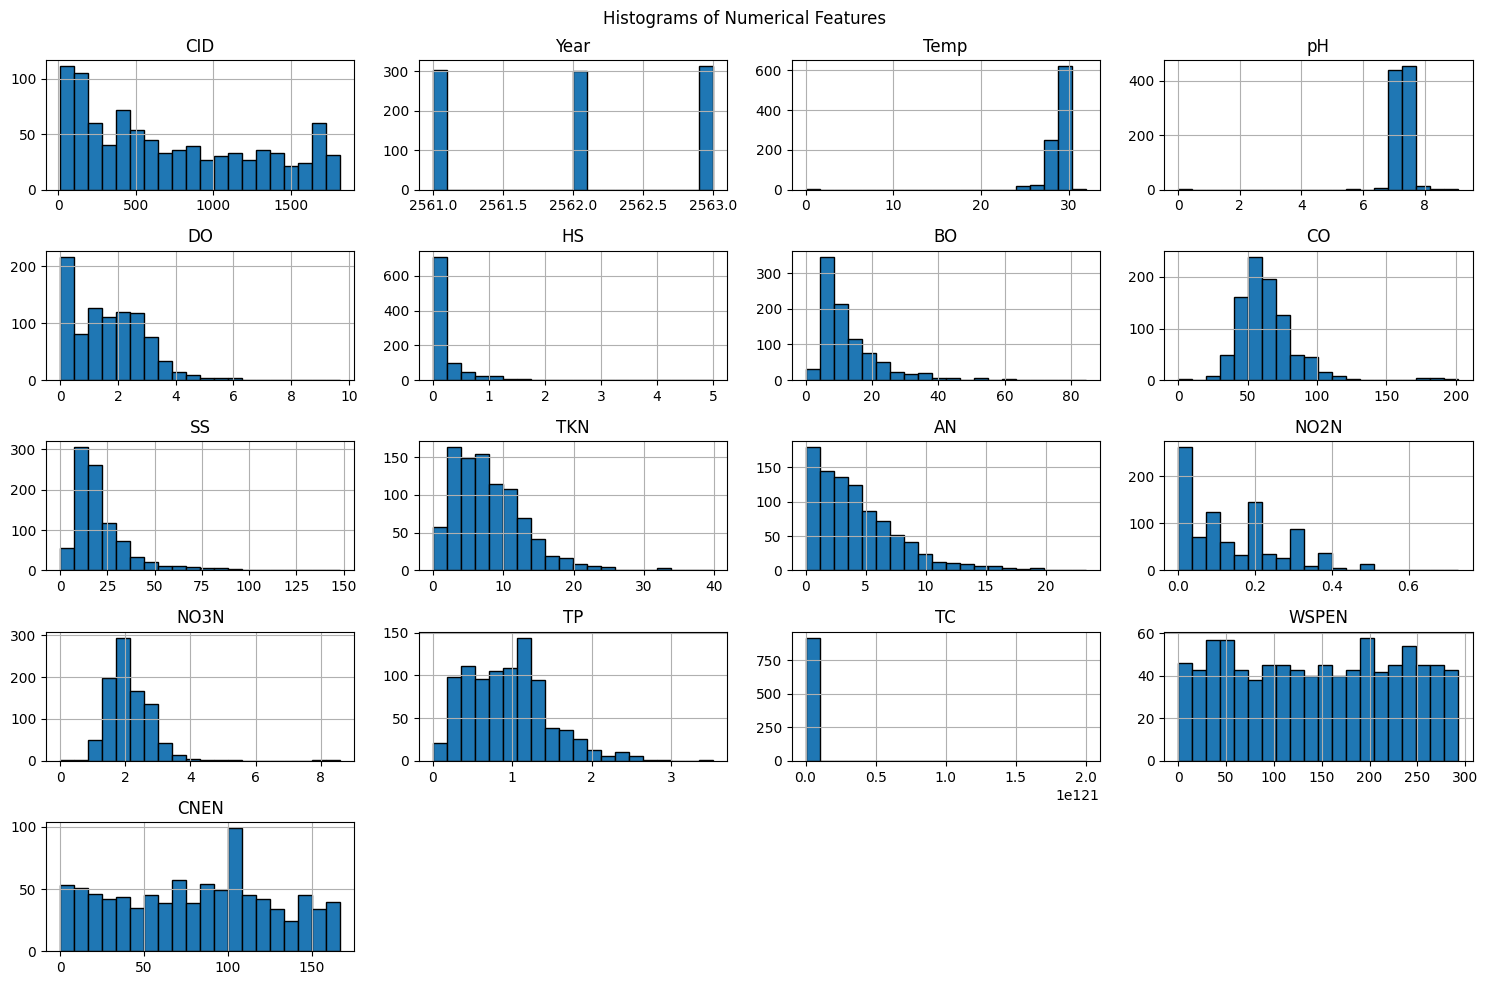

In [15]:
# Visualize distribution of numerical features
data.select_dtypes(include='number').hist(bins=20, figsize=(15,10), edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()

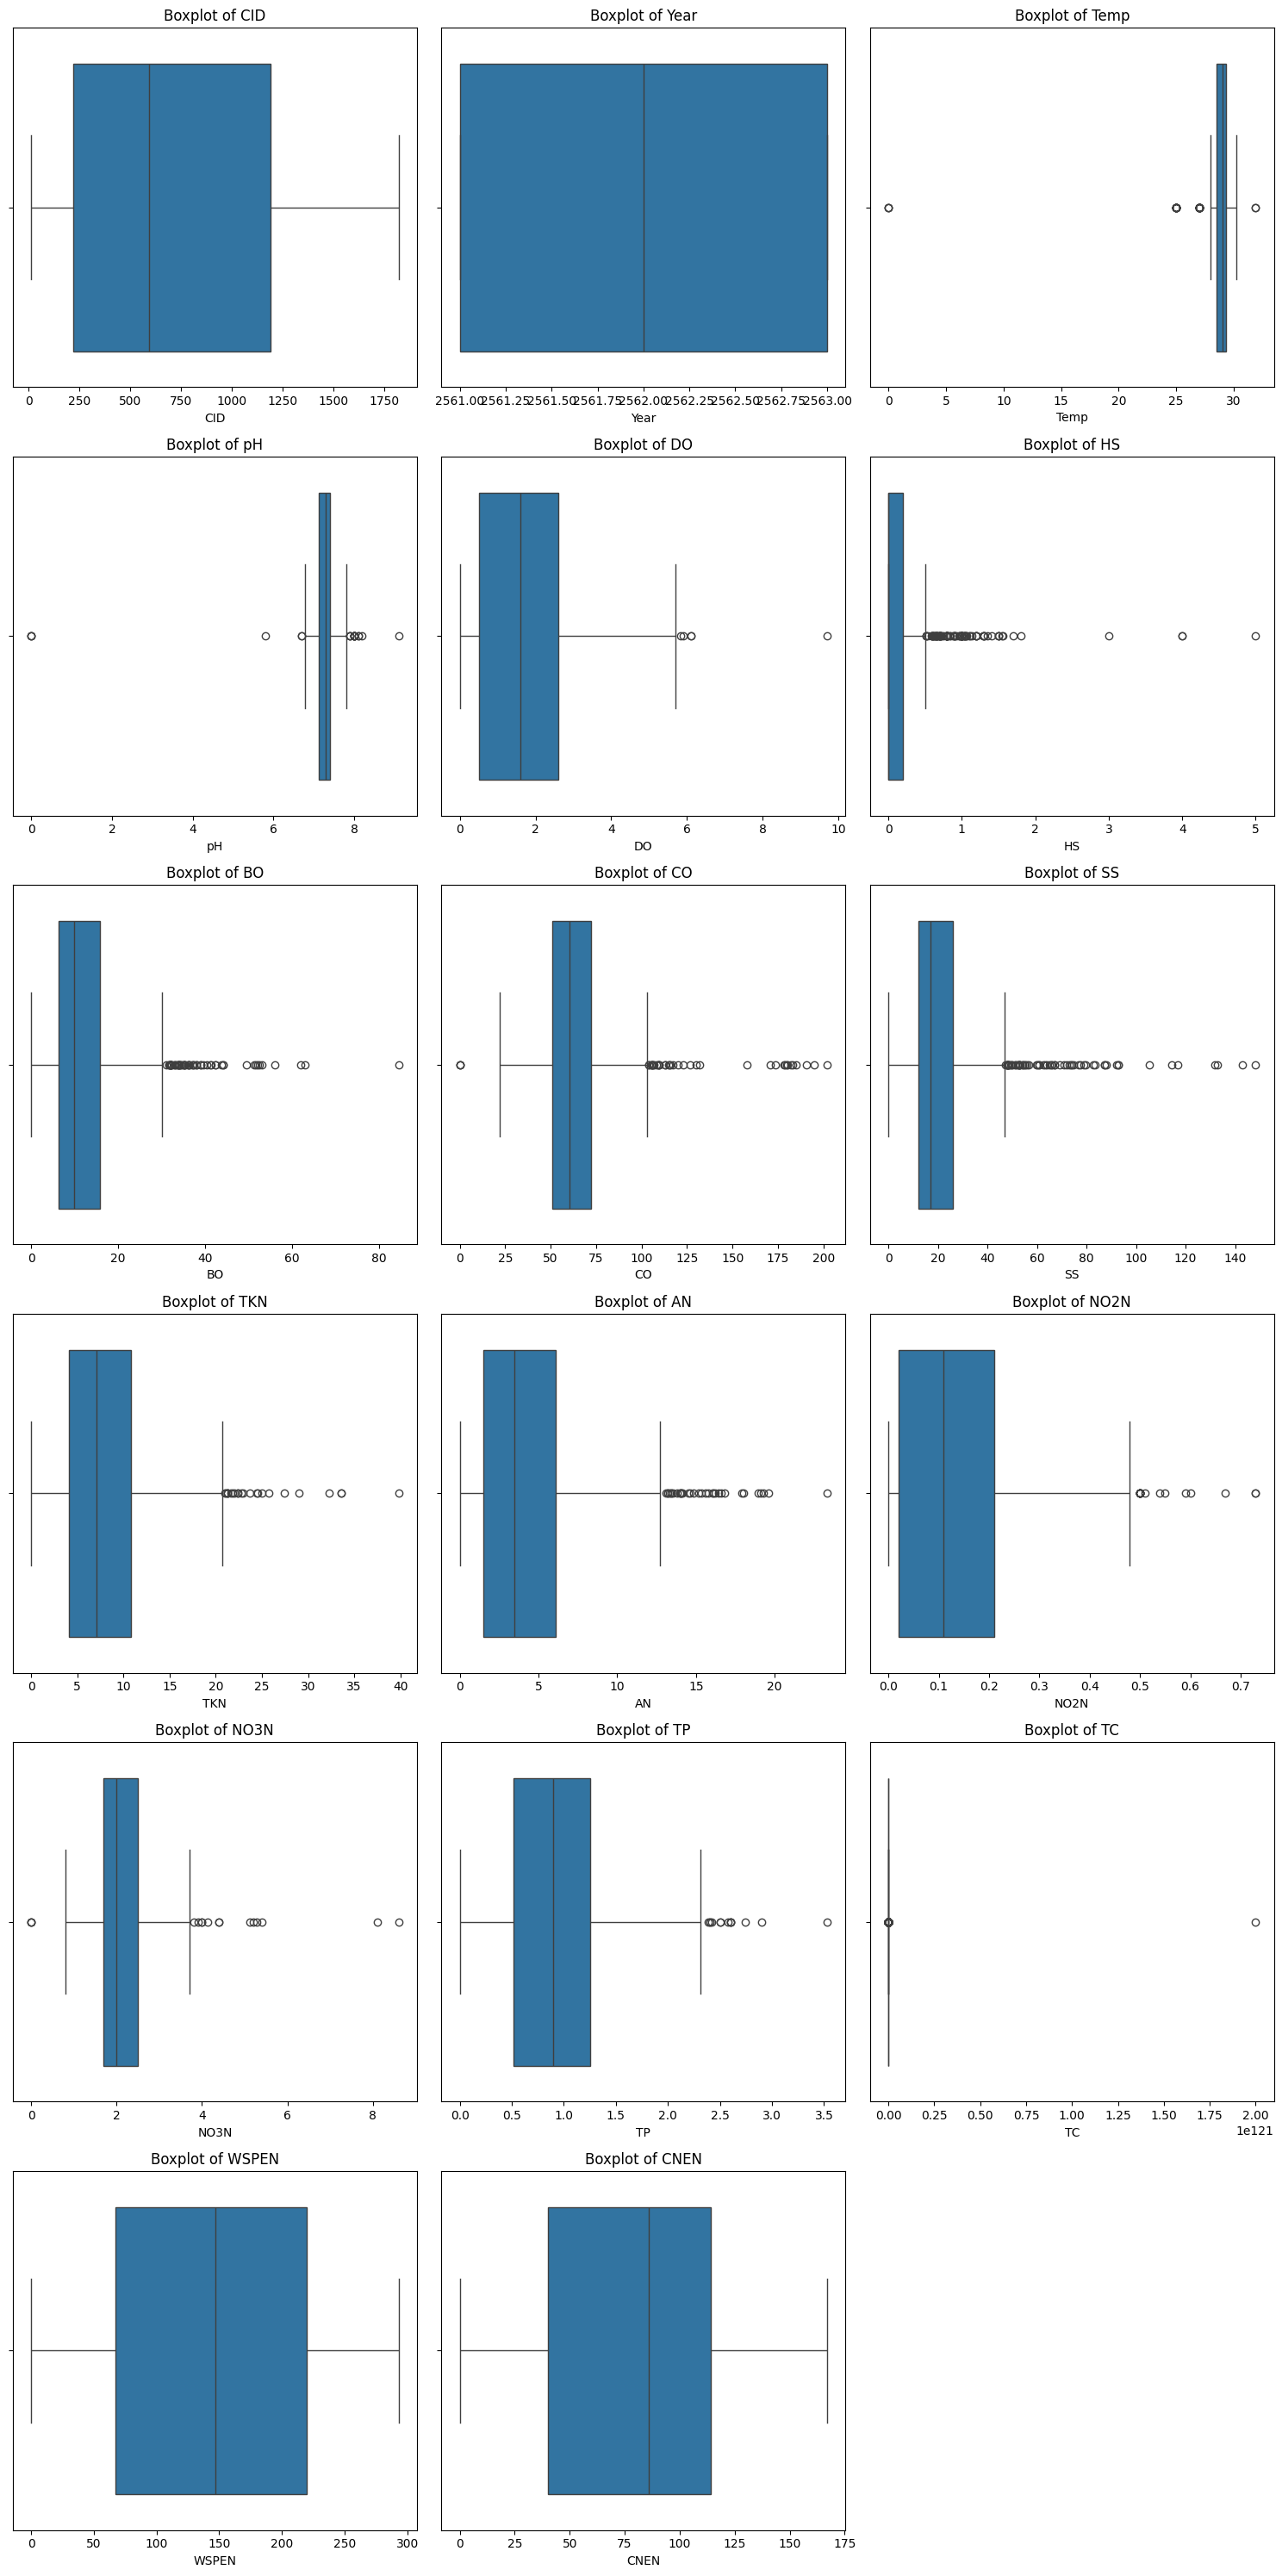

In [16]:
# Create boxplots to detect outliers
import math
numeric_cols = data.select_dtypes(include='number').columns
rows = math.ceil(len(numeric_cols)/3)

plt.figure(figsize=(15, 5 * rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

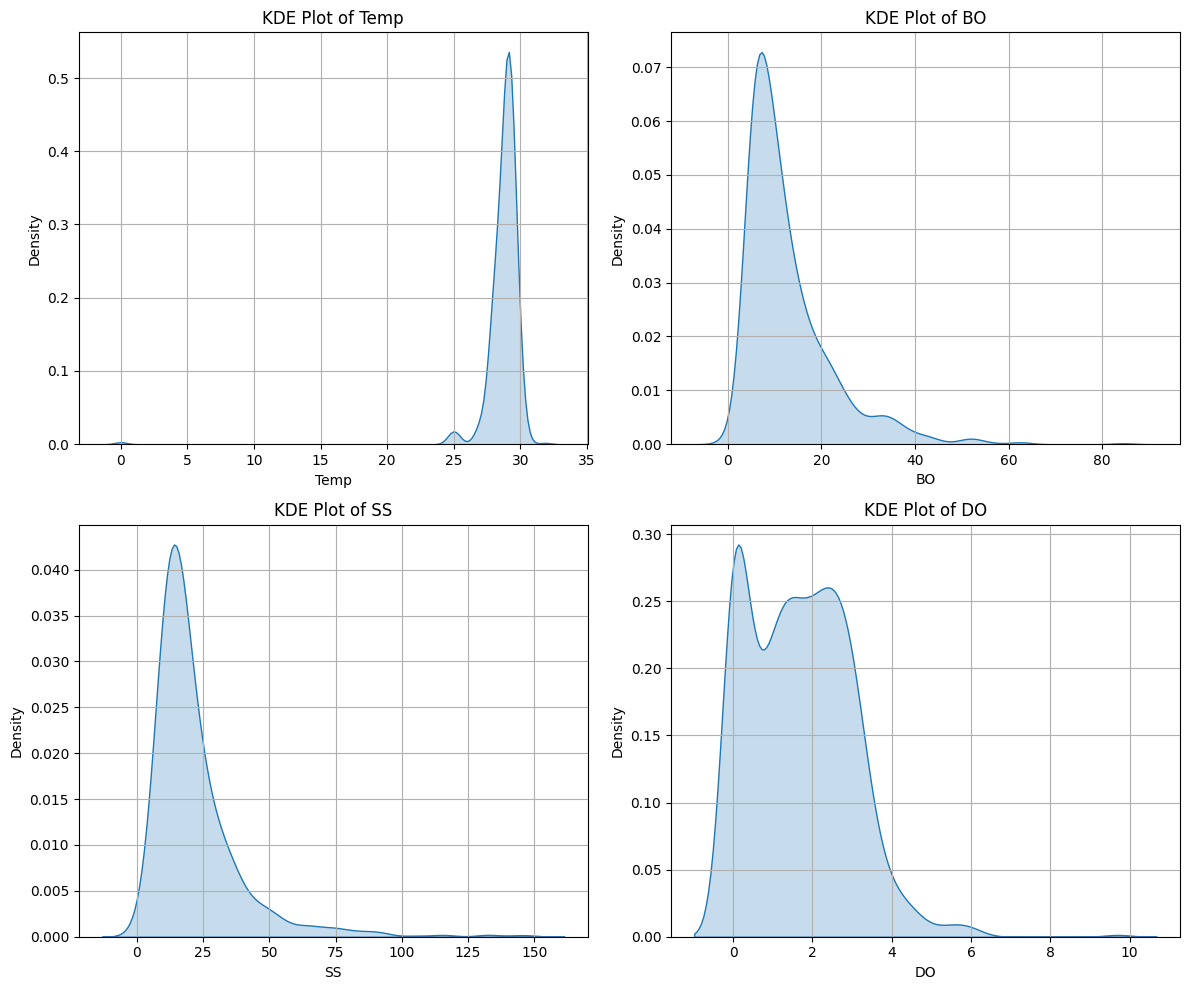

In [17]:
features = ['Temp', 'BO', 'SS', 'DO']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.kdeplot(data[col], fill=True, ax=axes[i])
    axes[i].set_title(f"KDE Plot of {col}")
    axes[i].grid(True)

plt.tight_layout()
plt.show()


In [18]:
from scipy.stats import zscore

z_scores = np.abs(zscore(data.select_dtypes(include='number')))
outlier_mask = (z_scores > 3)
outliers = (outlier_mask.sum(axis=1) > 0)
print("Outlier Rows:", outliers.sum())


Outlier Rows: 88


In [19]:
data['TC'].describe()

count     9.170000e+02
mean     2.181025e+118
std      6.604582e+119
min       0.000000e+00
25%       1.220000e+08
50%       1.530000e+10
75%       2.100000e+12
max      2.000000e+121
Name: TC, dtype: float64

**Feature Engineering**

Here lets engineer a new feature called WQI (Simple Water Quality Index) using the formula 
- WQI = ITEMP * (IBOD + ITSS + IDO)
where,
    - ITEMP = Water Temperature Index
    - IBOD = Biological Oxygen Demand Index
    - ITSS = Total Suspended Solids Index
    - IDO = Dissolved Oxygen Index

In [22]:

# Calculate TDS and COND
data['TDS'] = (
    0.5 * data['NO3N'] +
    0.7 * data['NO2N'] +
    0.4 * data['TKN'] +
    0.6 * data['AN'] +
    0.8 * data['TP']
)

# Scale TDS for realistic COND (200–1500 μS/cm)
data['TDS'] = data['TDS'] * 50
data['COND'] = 0.7 * data['TDS']

def calculate_wqi(row):
    # Extract parameters from the row
    temperature = row['Temp']
    bod = row['BO']
    tss = row['SS']
    do = row['DO']
    cond = row['COND']
    
    # Temperature Index (ITEMP)
    if temperature <= 20:
        itemp = 1
    else:
        itemp = max(0, 1 - 0.05 * (temperature - 20))
    
    # Biological Oxygen Demand Index (IBOD)
    if bod == 0:
        ibod = 30
    elif 0 < bod <= 12:
        ibod = max(0, 30 - 2.5 * bod)
    else:
        ibod = 0
    
    # Total Suspended Solids Index (ITSS)
    if tss == 0:
        itss = 25
    elif 0 < tss <= 250:
        itss = max(0, 25 - 0.1 * tss)
    else:
        itss = 0
    
    # Dissolved Oxygen Index (IDO)
    if do >= 10:
        ido = 25
    elif 0 < do < 10:
        ido = 2.5 * do
    else:
        ido = 0
    
    # Conductivity Index (ICOND)
    if cond <= 200:
        icond = 20
    elif 200 < cond <= 4000:
        icond = max(0, 20 - (20 / 3800) * (cond - 200))
    else:
        icond = 0
    
    # ISQA Calculation
    wqi = itemp * (ibod + itss + ido + icond)
    return wqi

data['WQI'] = data.apply(calculate_wqi, axis=1)

In [23]:
data['WQI'].describe()

count    917.000000
mean      30.170493
std        6.479873
min       16.597895
25%       24.880653
50%       29.405289
75%       34.947767
max       75.000000
Name: WQI, dtype: float64

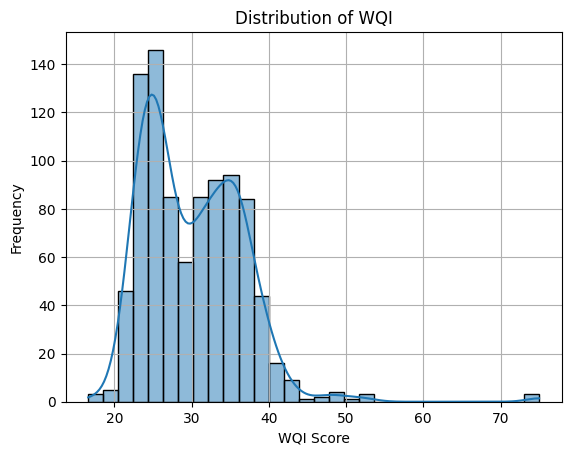

In [24]:
sns.histplot(data['WQI'], bins=30, kde=True)
plt.title("Distribution of WQI")
plt.xlabel("WQI Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [25]:
correlations = data.corr(numeric_only=True)['WQI'].sort_values(ascending=False)
print("Top correlated features with WQI:\n", correlations)


Top correlated features with WQI:
 WQI      1.000000
DO       0.513351
NO2N     0.085327
WSPEN    0.004301
TC      -0.039033
SS      -0.039199
CNEN    -0.042559
CID     -0.074837
NO3N    -0.164722
pH      -0.290010
Year    -0.334020
HS      -0.409540
CO      -0.440432
Temp    -0.533102
BO      -0.670588
TP      -0.699387
AN      -0.703249
TKN     -0.720563
COND    -0.730575
TDS     -0.730575
Name: WQI, dtype: float64


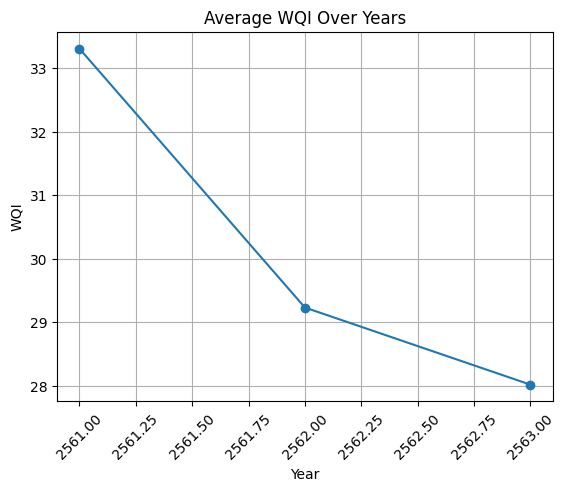

In [26]:
# Trend over year (if multiple years exist)
data.groupby('Year')['WQI'].mean().plot(marker='o')
plt.title("Average WQI Over Years")
plt.xlabel("Year")
plt.ylabel("WQI")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


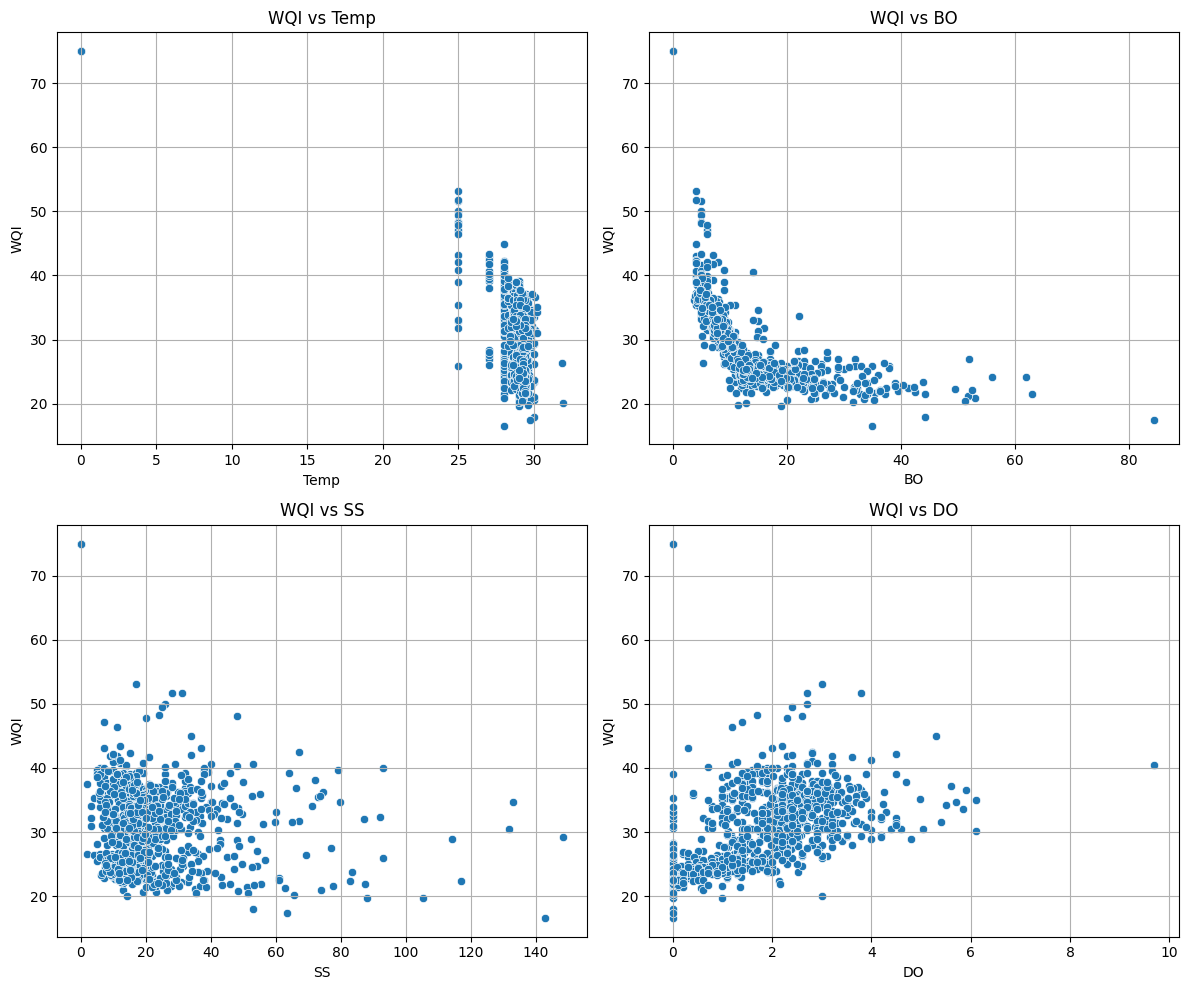

In [27]:
# Select top 4 key features to visualize against WQI
features = ['Temp', 'BO', 'SS', 'DO']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(data=data, x=feature, y='WQI', ax=axes[i])
    axes[i].set_title(f"WQI vs {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("WQI")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

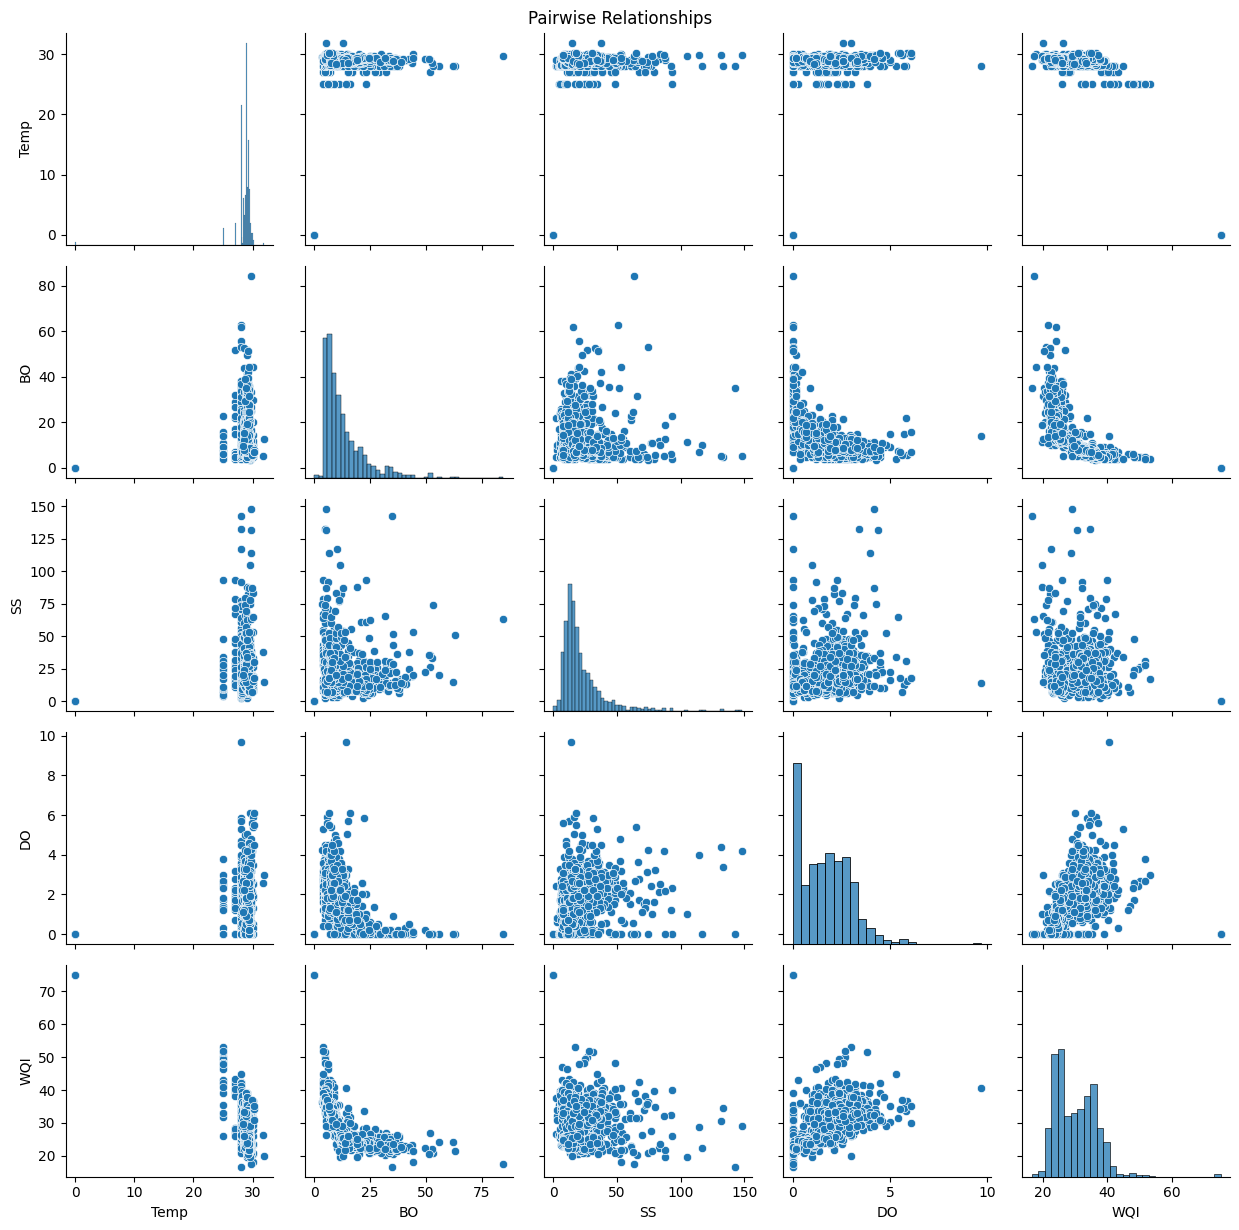

In [28]:
#pairplot
sns.pairplot(data[['Temp', 'BO', 'SS', 'DO', 'WQI']])
plt.suptitle("Pairwise Relationships")
plt.tight_layout()
plt.show()


<Axes: >

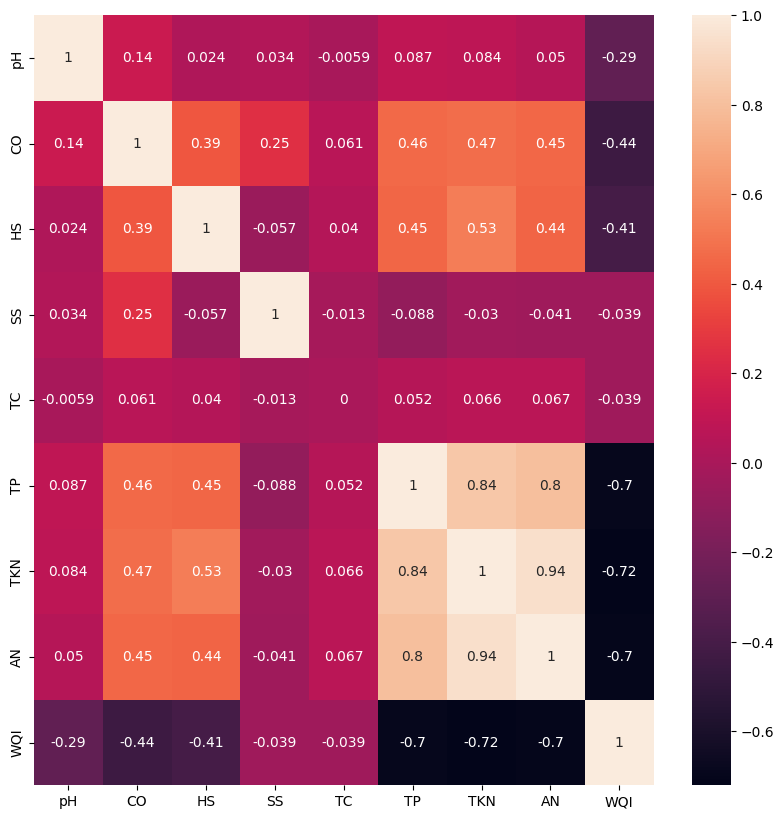

In [29]:
plt.figure(figsize=(10, 10))
corr_data = data[ ['pH', 'CO', 'HS', 'SS', 'TC', 'TP', 'TKN','AN','WQI'] ]
sns.heatmap(corr_data.corr(), annot=True)

In [30]:
data['TC'] = np.log1p(data['TC'])

In [60]:
X = data[ ['pH', 'CO', 'HS', 'TC'] ]

y = data['WQI']

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state=42)

In [62]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

        return [min_val, max_val]
    
    return []

In [63]:
# removing the outliers from the X_train columns using the bounds
for col in X_train.columns:
    bounds = []
    bounds = outlier_count(col)
    if len(bounds) == 0:
        continue
    
    X_train[col] = X_train[col].clip(lower=bounds[0], upper=bounds[1])


---------------pH---------------

Number of outliers: 15
Percent of data that is outlier: 1.93%

---------------CO---------------

Number of outliers: 34
Percent of data that is outlier: 4.36%

---------------HS---------------

Number of outliers: 73
Percent of data that is outlier: 9.37%

---------------TC---------------

Number of outliers: 4
Percent of data that is outlier: 0.51%


In [74]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_resampled = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge

algorithms = {
    "Lasso": Lasso(random_state=42),
    "Ridge": Ridge(random_state=42),
    "SVR": SVR(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [76]:
from sklearn.model_selection import KFold, cross_val_score

#defining splits
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in algorithms.items():
    cv_scores = cross_val_score(model, X_train_resampled, y_train, cv=kfold, scoring='neg_median_absolute_error')
    # Convert neg MSE to RMSE
    # rmse_scores = np.sqrt(-cv_scores)

    print(f"{name} - Score: {cv_scores}; Mean: {cv_scores.mean()}")

Lasso - Score: [-0.01975906 -0.01640455 -0.01509597 -0.01407211 -0.01795086]; Mean: -0.01665651060204413
Ridge - Score: [-0.0174999  -0.01702677 -0.01464199 -0.01501933 -0.01768494]; Mean: -0.01637458695358715
SVR - Score: [-0.01572905 -0.01174897 -0.01153948 -0.01055116 -0.01758176]; Mean: -0.01343008658793301
Random Forest - Score: [-0.01263932 -0.01202267 -0.01166232 -0.00915561 -0.01078809]; Mean: -0.011253600986320365
Gradient Boosting - Score: [-0.01256625 -0.01097681 -0.00990016 -0.00986089 -0.00992139]; Mean: -0.010645099412649947


In [78]:
from sklearn.model_selection import GridSearchCV

param_grid_gb = {
    'n_estimators': [25, 50, 100, 200],  # Number of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 4, 5, 6],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Min samples to split
    'min_samples_leaf': [1, 2, 4],  # Min samples per leaf
    'subsample': [0.7, 0.8, 0.9, 1.0],  # Subsample for stochastic gradient boosting
    'loss': ['squared_error', 'absolute_error', 'huber'],  # Loss function
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider for each split
}

gb = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=gb,
                           param_grid=param_grid_gb,
                           cv=kfold,
                           n_jobs=-1,
                           verbose=0,
                           scoring='neg_median_absolute_error')

# Fit to training data
grid_search.fit(X_train_resampled, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50, 'subsample': 0.9}


In [85]:
grid_search.best_estimator_

GradientBoostingRegressor(max_depth=4, max_features='sqrt', min_samples_leaf=2,
                          min_samples_split=10, n_estimators=50,
                          random_state=42, subsample=0.9)

In [87]:
import joblib

model_name = 'wpp_model_isqa.pkl'

joblib.dump(grid_search.best_estimator_, model_name)

['wpp_model_isqa.pkl']

In [88]:
# Load the model
loaded_model = joblib.load(model_name)

# Make predictions
y_pred = loaded_model.predict(X_test)

In [89]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

print("MSE    :", mean_squared_error(y_test, y_pred))
print("MAE:   :", mean_absolute_error(y_test, y_pred))
print("Med. AE  :", median_absolute_error(y_test, y_pred))

print("R2:    :", r2_score(y_test, y_pred))

MSE    : 9.786032103133405
MAE:   : 2.264725425341696
RMSLE  : 0.0958023990798021
R2:    : 0.8126118652809


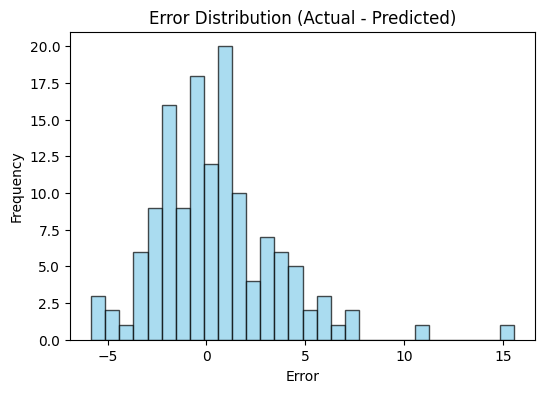

In [90]:
errors = y_test - y_pred

# Plotting errors
plt.figure(figsize=(6, 4))

# Plotting error distribution
plt.hist(errors, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution (Actual - Predicted)')
plt.show()

In [91]:
df_comparison = pd.DataFrame({
    'Actual_ISQA': y_test,
    'Predicted_ISQA': y_pred
})

df_comparison['Error'] = df_comparison['Actual_ISQA'] - df_comparison['Predicted_ISQA']
# df_comparison['Error'].head()
df_comparison.sort_values(by='Error', ascending=False)

,Actual_ISQA,Predicted_ISQA,Error
137,51.712500,36.162970,15.549530
141,46.425000,35.627373,10.797627
139,33.075000,25.621034,7.453966
120,39.750000,32.542952,7.207048
425,34.350219,27.428871,6.921349
...,...,...,...
866,26.946521,31.487615,-4.541094
597,17.437516,22.451711,-5.014195
541,17.998658,23.321858,-5.323200
44,25.816132,31.170221,-5.354089
